# Plots for SULI Presentation
### Spencer Everett, SLAC, 8/10/2015

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [3]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [4]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [5]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

['/home/spencer/Documents/Pangloss/calib/Millennium/catalog_example.txt']
['/home/spencer/Documents/Pangloss/calib/Millennium/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits']


In [6]:
B = pangloss.BackgroundCatalog(N=30,domain=s,field=[0,0,0,0],sigma_e=0.05) # High ellipticity used to highlight the intrinsic shape of background sources

NameError: name 's' is not defined

In [11]:
B.lens_by_map(K,S)
B.lens_by_halos()

0   0.0 %
5   11.0 %
10   23.0 %
15   34.0 %
20   46.0 %
25   58.0 %
30   69.0 %
35   81.0 %
40   93.0 %
0   0.0 %
5   11.0 %
10   23.0 %
15   34.0 %
20   46.0 %
25   58.0 %
30   69.0 %
35   81.0 %
40   93.0 %
average CPU time per background galaxy:  0.0509379076403 +/- 0.0494652032436


## Maps and Lensing

In [8]:
#s = [1.55,1.52,-1.61,-1.59]
#s = [1.65,1.5,-1.65,-1.5]
s = [1.54,1.52,-1.61,-1.59]
#s = [1.1175,1.0925,-1.54,-1.515]
m1 = 10.5
#m2 = 11.95

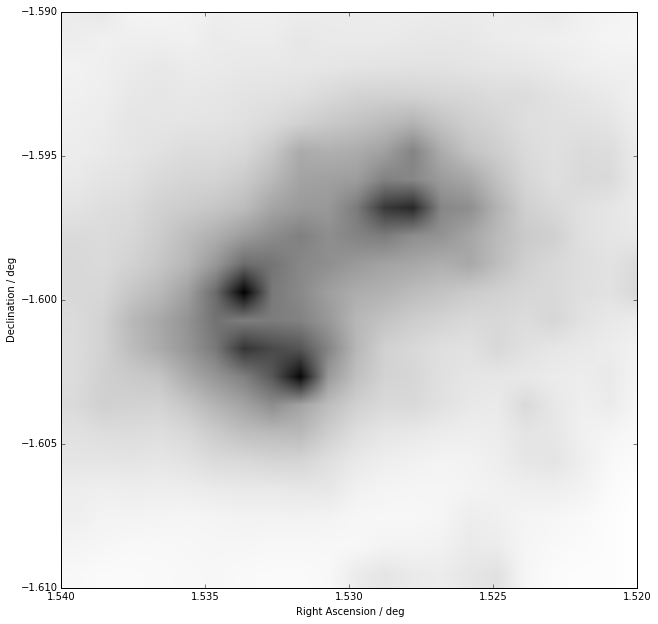

In [17]:
K.plot(subplot=s)

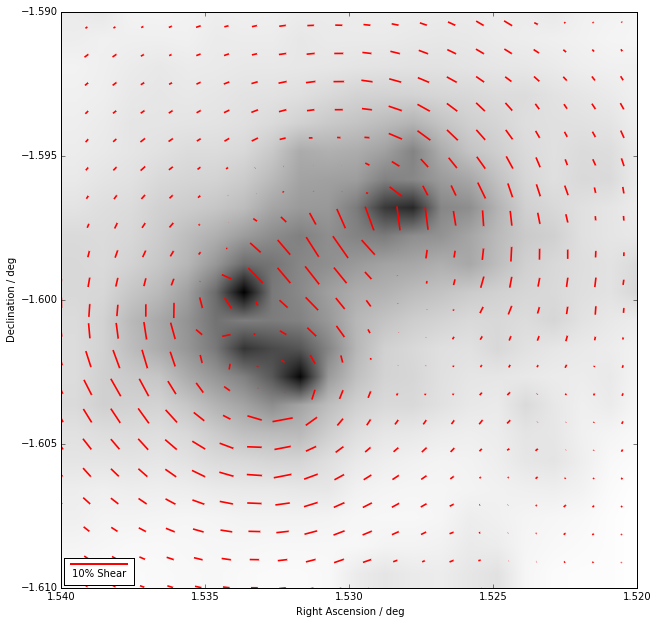

In [18]:
K.plot(subplot=s)
S.plot()

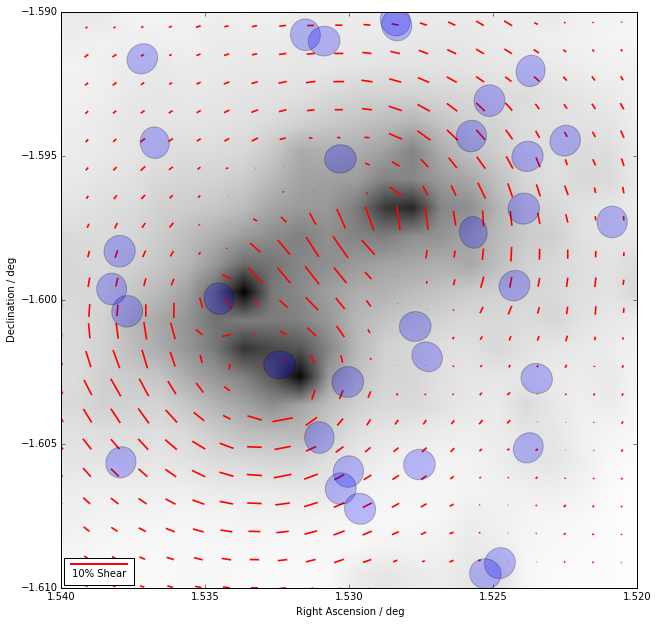

In [25]:
K.plot(subplot=s)
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='none')

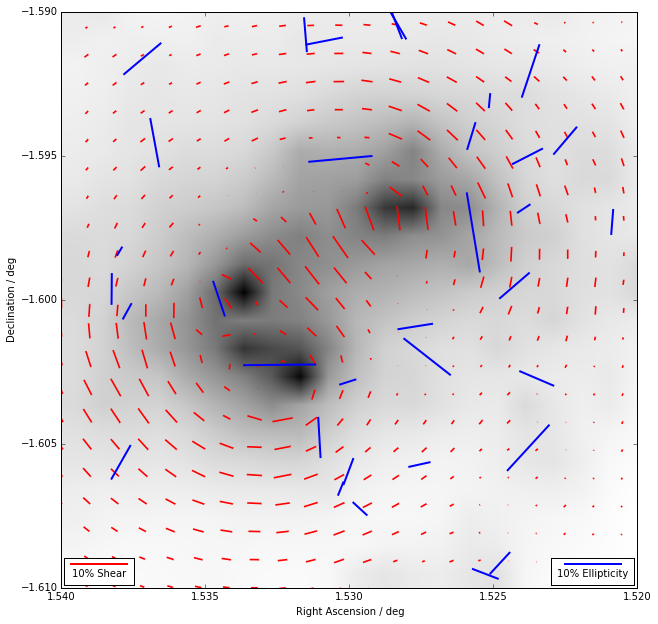

In [19]:
K.plot(subplot=s)
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='none')

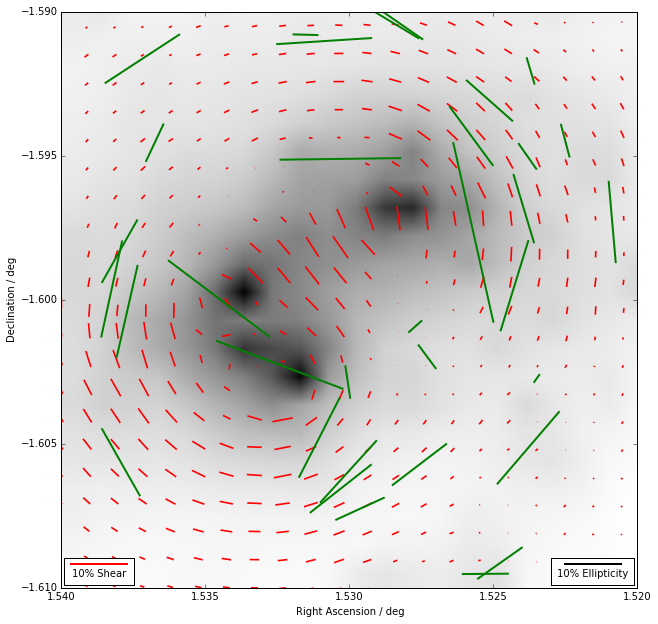

In [26]:
K.plot(subplot=s)
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='map')

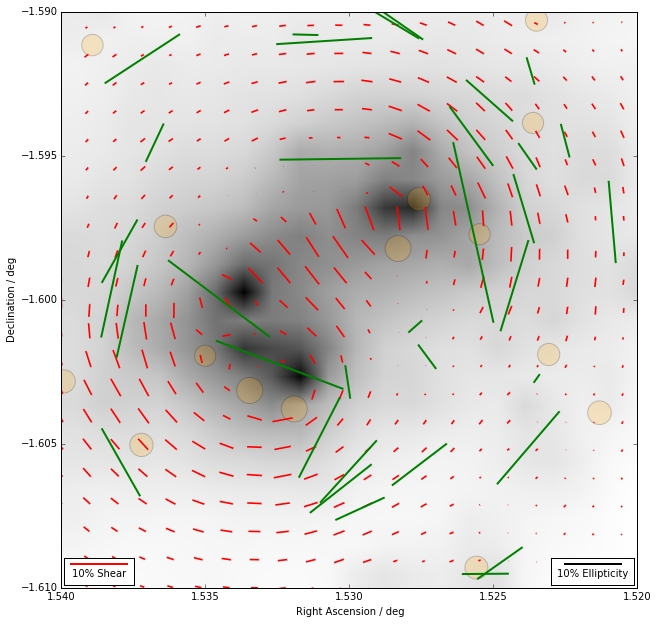

In [27]:
K.plot(subplot=s)
F.plot(mass_lim=[10**10.25,10**12])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='map')

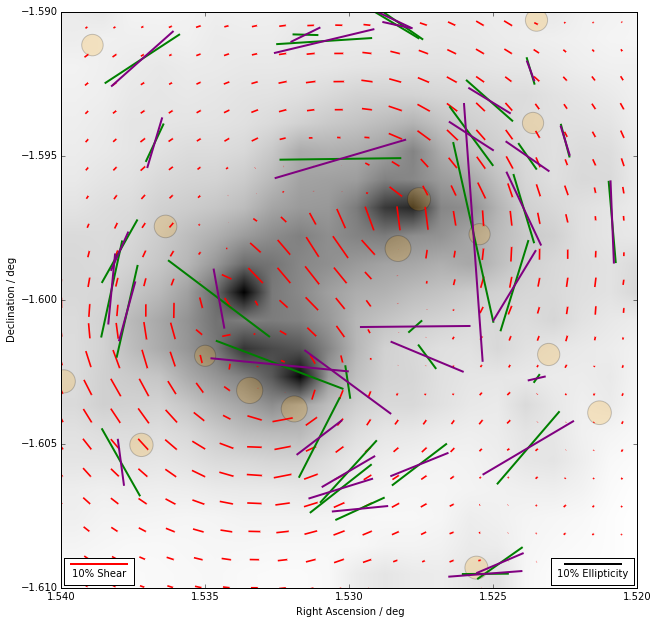

In [28]:
K.plot(subplot=s)
F.plot(mass_lim=[10**10.25,10**12])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='map')
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='halo')

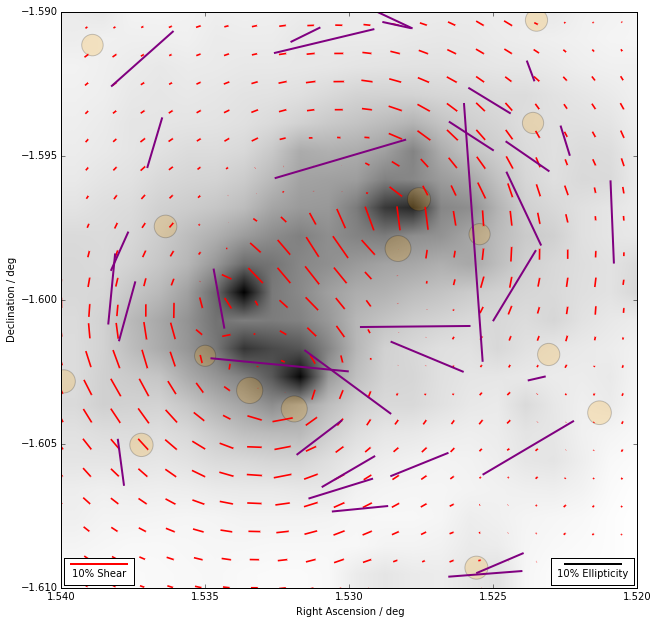

In [29]:
K.plot(subplot=s)
F.plot(mass_lim=[10**10.25,10**12])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='stick',lensed='halo')

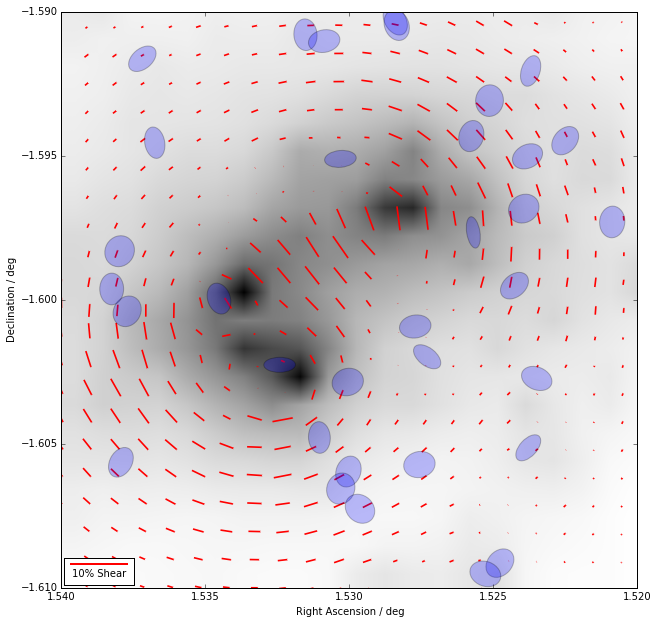

In [30]:
B.galaxies['eMod_int'] *= 5.0

K.plot(subplot=s)
#F.plot(mass_lim=[10**m1,10**12])
S.plot()
B.plot(mass_lim=[10**11,10**12],graph='ellipse',lensed='none')

In [31]:
del B

## Correlation Functions

In [19]:
#s = [1.65,1.35,-1.65,-1.35]
s = [1.75,1.25,-1.75,-1.25]

In [22]:
B = pangloss.BackgroundCatalog(N=30,domain=s,field=[0,0,0,0],sigma_e=0.05)
B.lens_by_map(K,S)
B.drill_lightcones(foreground=F)
B.lens_by_halos()

0   0.0 %
2700   10.0 %


KeyboardInterrupt: 

In [223]:
r = 2.0
ms =  0.1

gg_none = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='none')
gg_map = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='map')
gg_halo = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='halo')

ng_none = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='none')
ng_map = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='map')
ng_halo = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='halo')

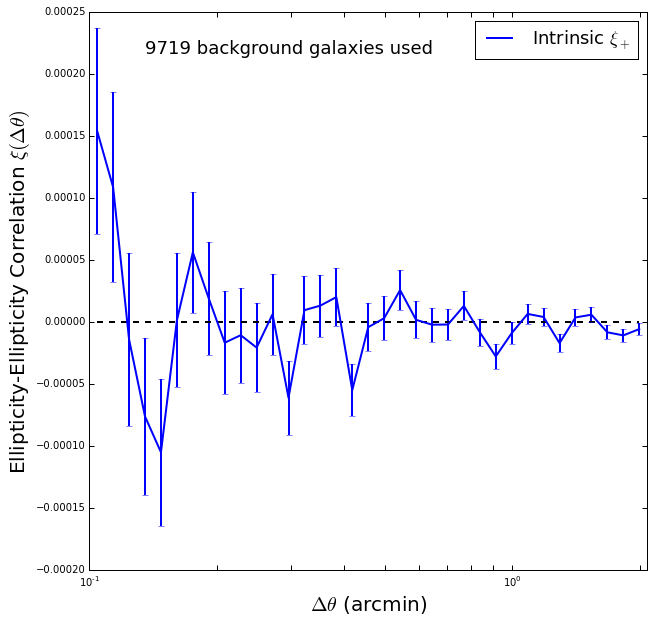

In [224]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')

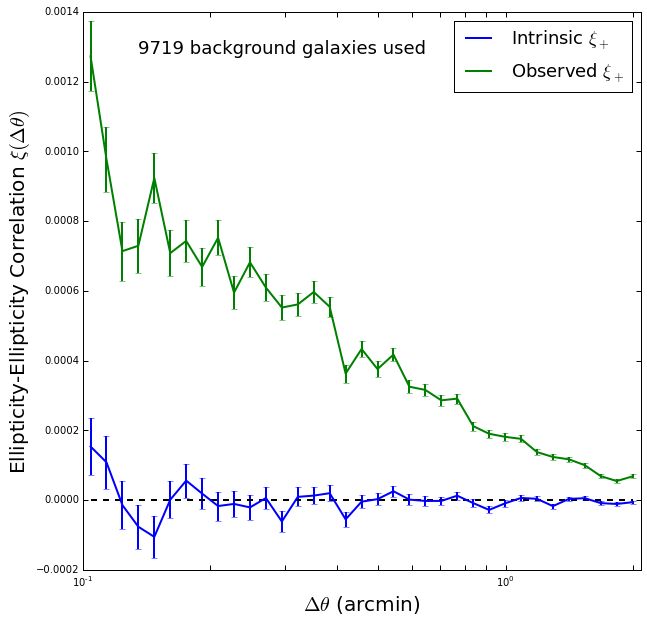

In [225]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green')

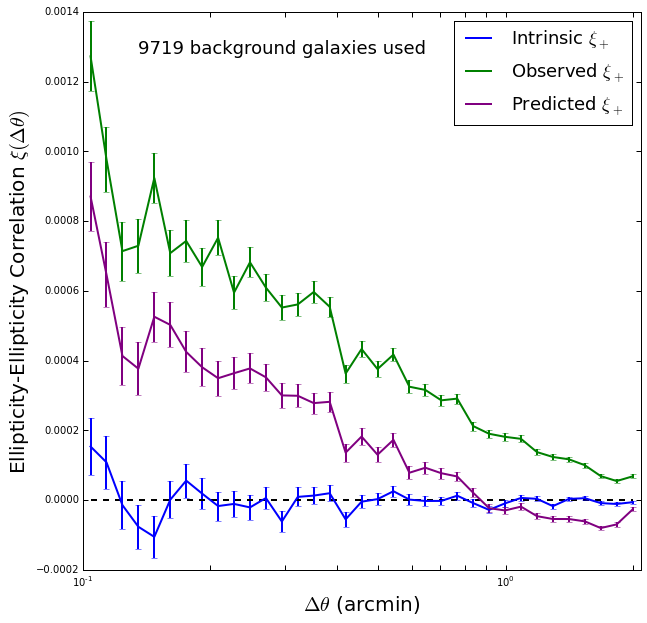

In [226]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green')
pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='plus',lensed='halo',color='purple')

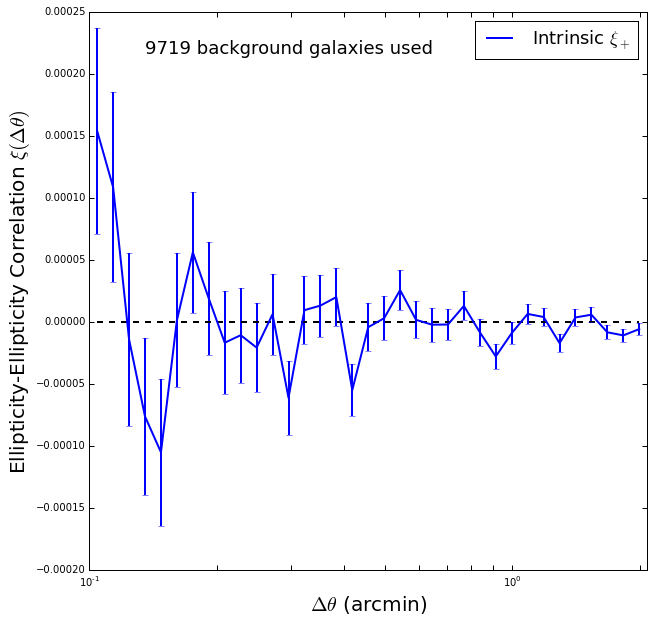

In [227]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')

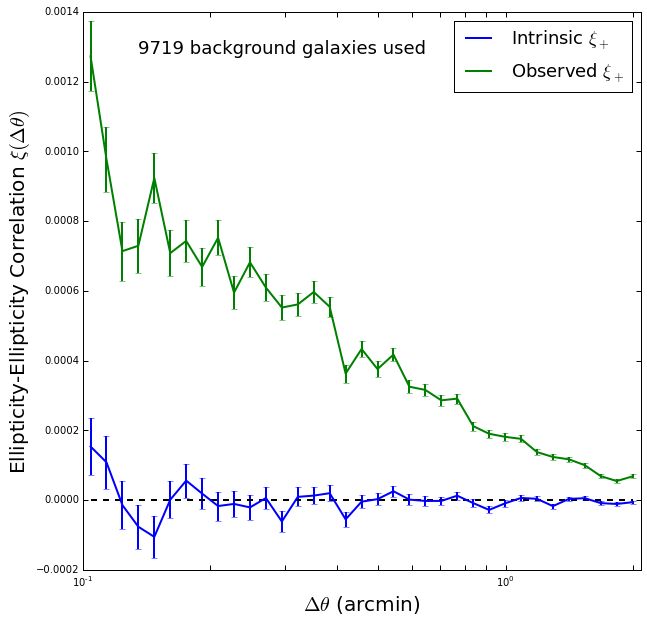

In [228]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green')

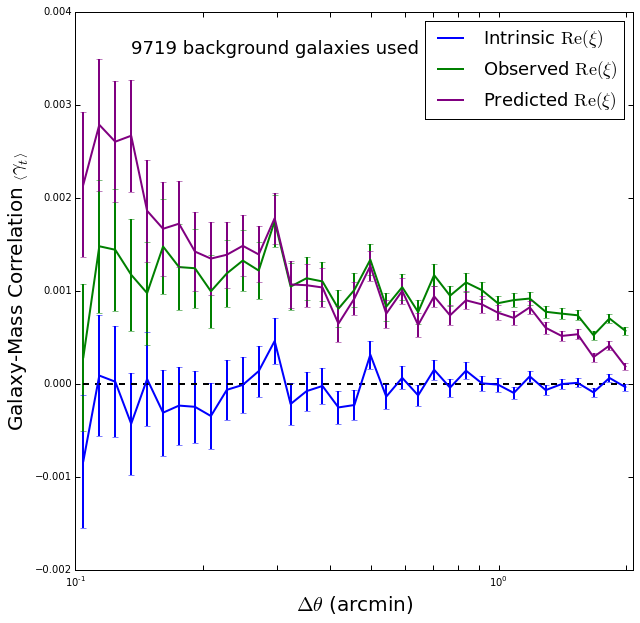

In [229]:
pangloss.plotting.plot_corr(ng_none,corr_type='ng',corr_comp='real',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')

In [4]:
pangloss.plotting.plot_corr(ng_none,corr_type='ng',corr_comp='real',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')

NameError: name 'ng_none' is not defined

In [230]:
del B
del gg_none
del gg_map
del gg_halo
del ng_none
del ng_map
del ng_halo

## Other Stuff

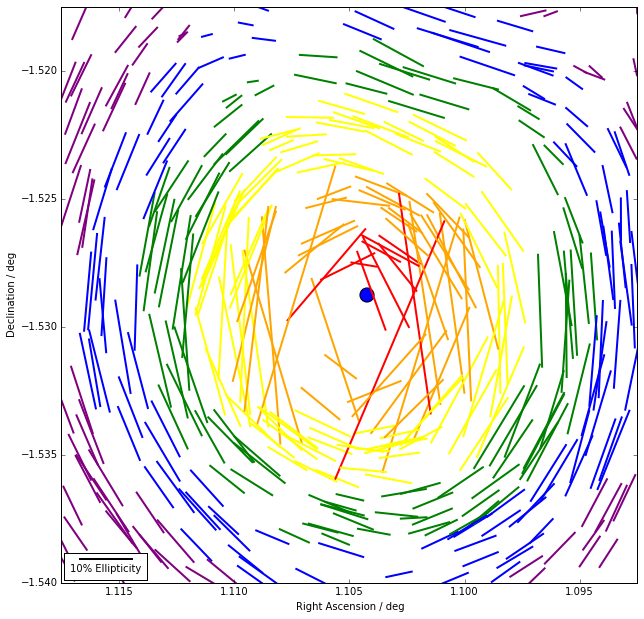

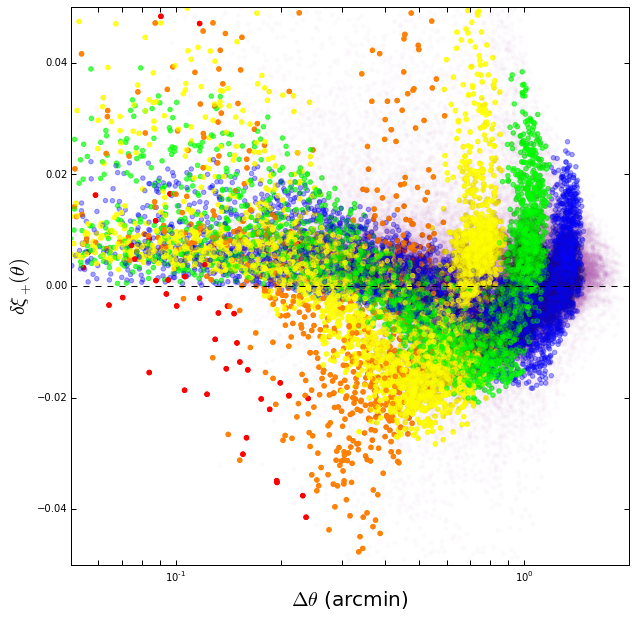

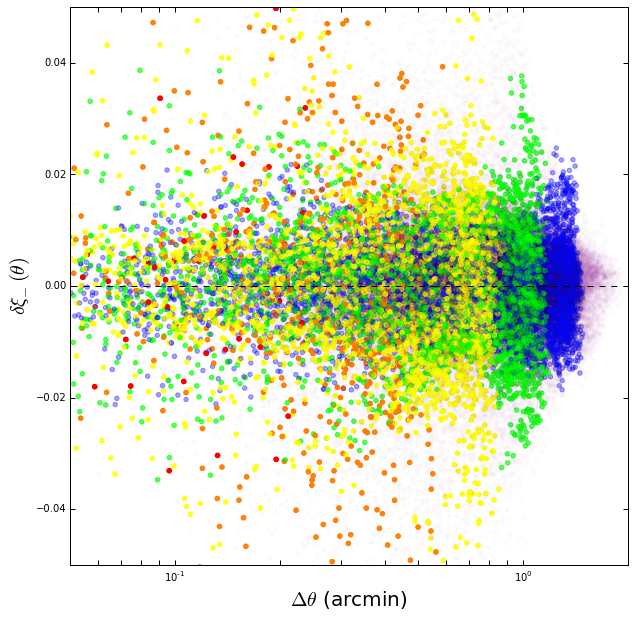

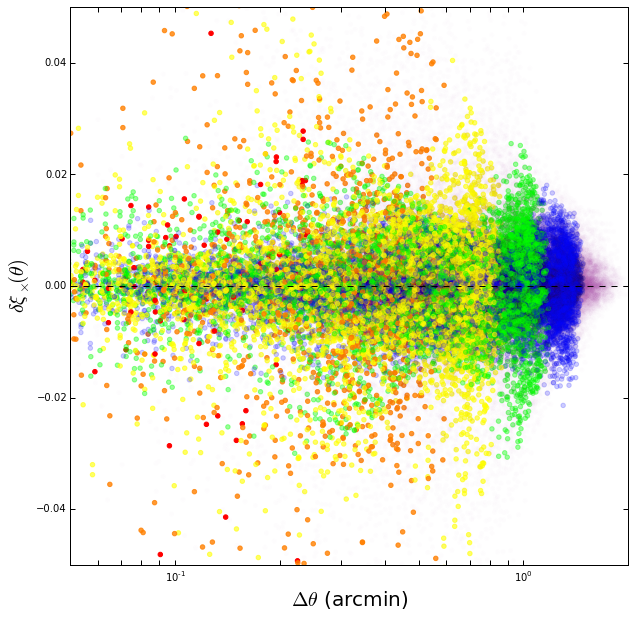

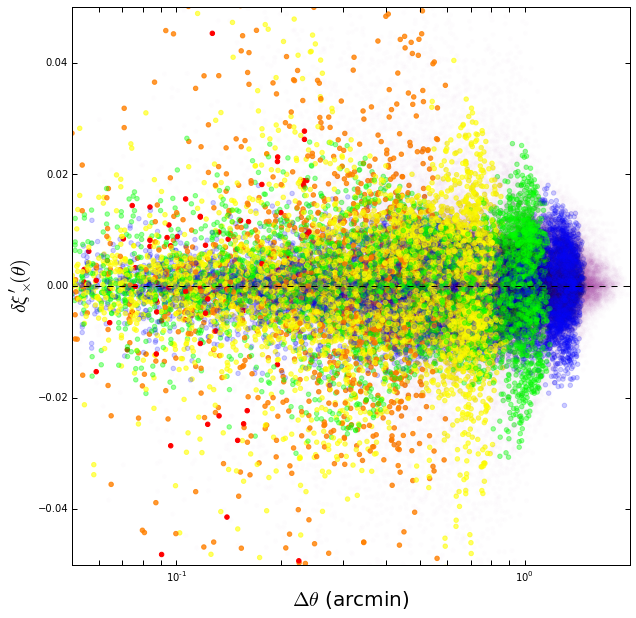

In [58]:
r,del_xi_p,del_xi_m,del_xi_x,del_xi_xp,c = pangloss.plotting.plot_corr_color_demo(N=200)

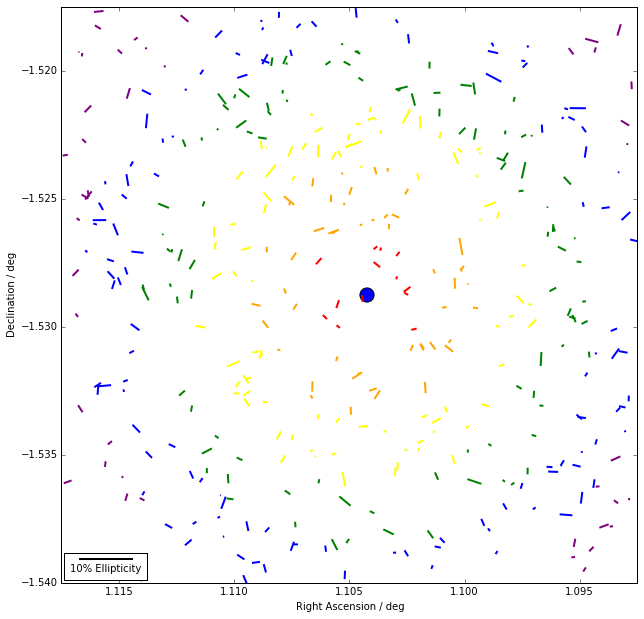

In [233]:
#B = pangloss.BackgroundCatalog(N=200,sigma_e=0.01,domain=[1.1175,1.0925,-1.54,-1.515],field=[0,0,0,0]) # High ellipticity used to highlight the intrinsic shape of background sources
#pangloss.plotting.plot_lensed_colors(B)

In [201]:
red = (1,0,0,1)
orange = (1,0.5,0,0.8)
yellow = (1,1,0,0.6)
green = (0,1,0,0.4)
blue = (0,0,1,0.2)
purple = (0.5,0,0.5,0.01)

r_red = []
r_orange = []
r_yellow = []
r_green = []
r_blue = []
r_purple = []

del_red = []
del_orange = []
del_yellow = []
del_green = []
del_blue = []
del_purple = []

c_red = []
c_orange = []
c_yellow = []
c_green = []
c_blue = []
c_purple = []
c_purple = []

In [202]:
'''
r = np.array(r)
del_xi_p = np.array(del_xi_p)
c = np.array(c)
'''

for i in range(len(c)):
    if c[i] == red:
        r_red.append(r[i])
        del_red.append(del_xi_p[i])
        c_red.append(c[i])
        
    if c[i] == orange:
        r_orange.append(r[i])
        del_orange.append(del_xi_p[i])
        c_orange.append(c[i])
        
    if c[i] == yellow:
        r_yellow.append(r[i])
        del_yellow.append(del_xi_p[i])
        c_yellow.append(c[i])
        
    if c[i] == green:
        r_green.append(r[i])
        del_green.append(del_xi_p[i])
        c_green.append(c[i])
        
    if c[i] == blue:
        r_blue.append(r[i])
        del_blue.append(del_xi_p[i])
        c_blue.append(c[i])
        
    if c[i] == purple:
        r_purple.append(r[i])
        del_purple.append(del_xi_p[i])
        c_purple.append(c[i])

In [203]:
rc = []
delc = []
cc = []

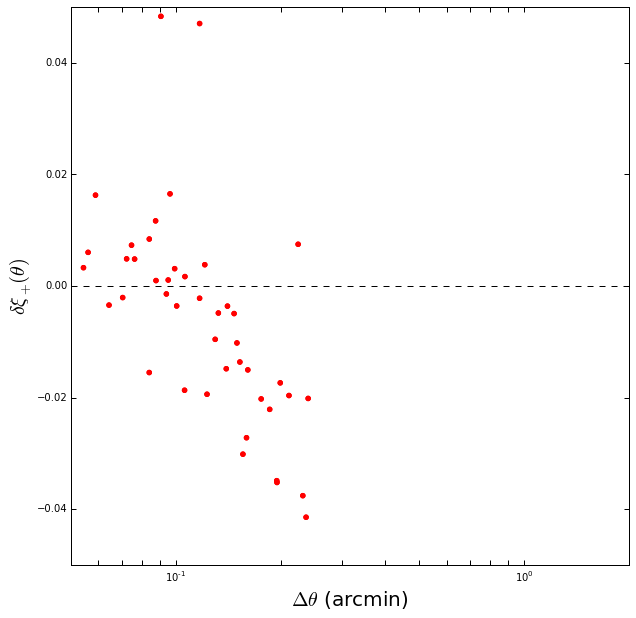

In [204]:
rc += r_red
delc += del_red
cc += c_red

#plt.scatter(np.array(rc)*60.0,delc,cc)
         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

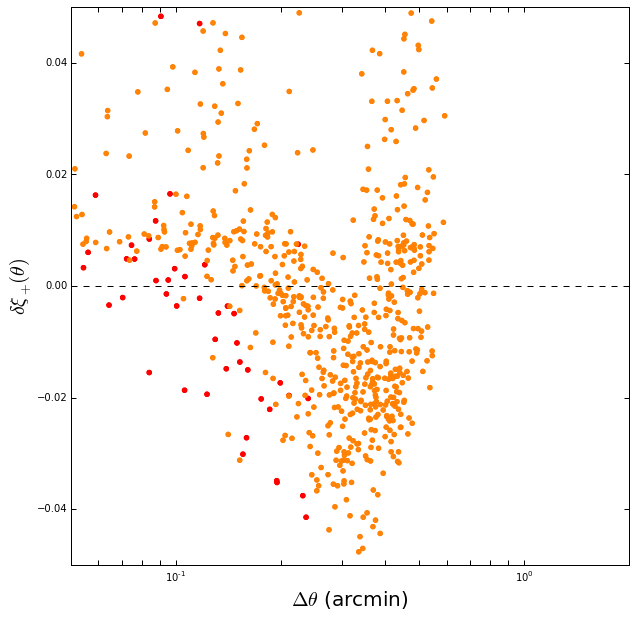

In [205]:
rc += r_orange
delc += del_orange
cc += c_orange
         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

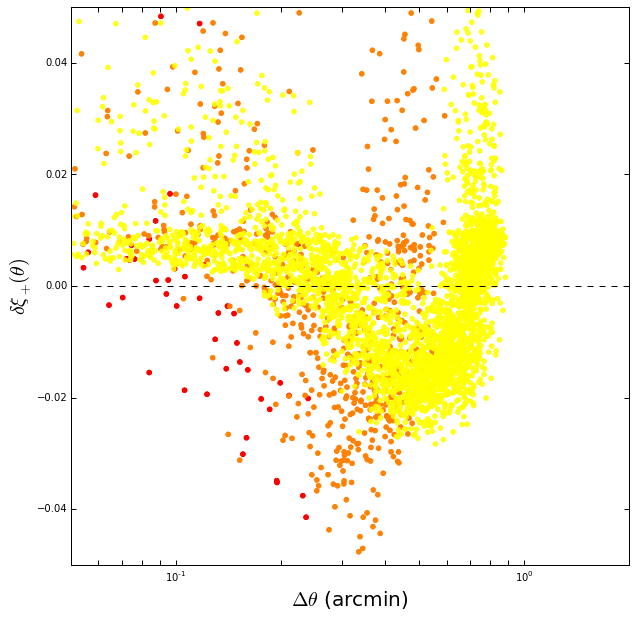

In [206]:
rc += r_yellow
delc += del_yellow
cc += c_yellow
         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

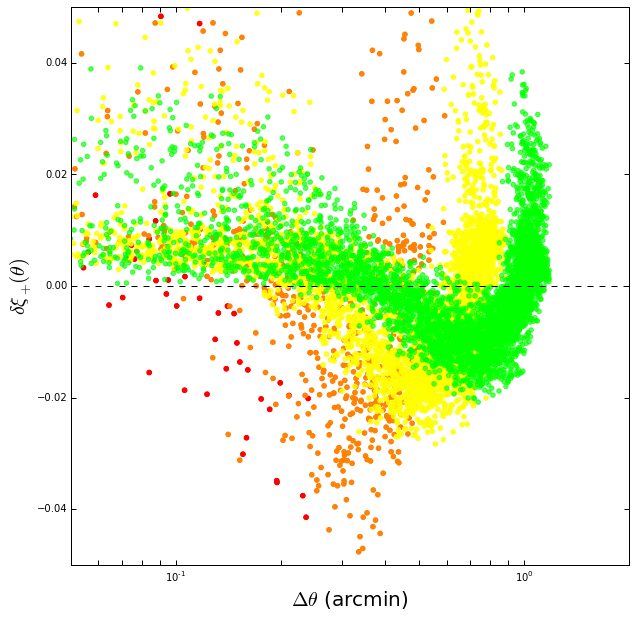

In [207]:
rc += r_green
delc += del_green
cc += c_green
         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

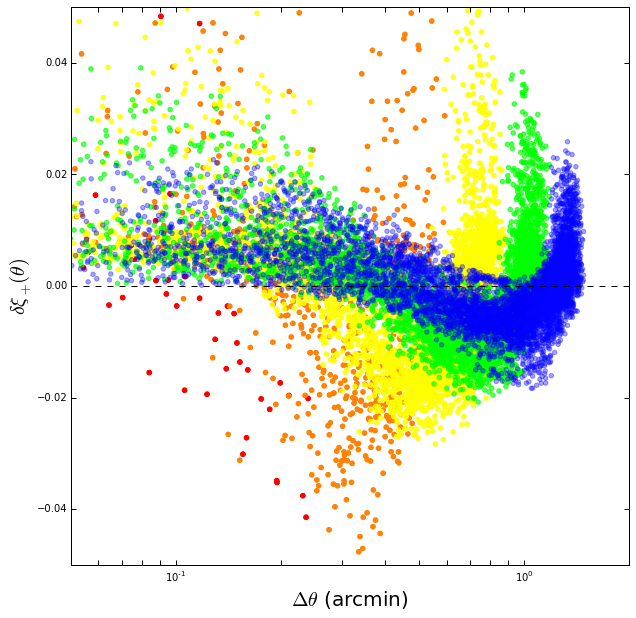

In [208]:
rc += r_blue
delc += del_blue
cc += c_blue
         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

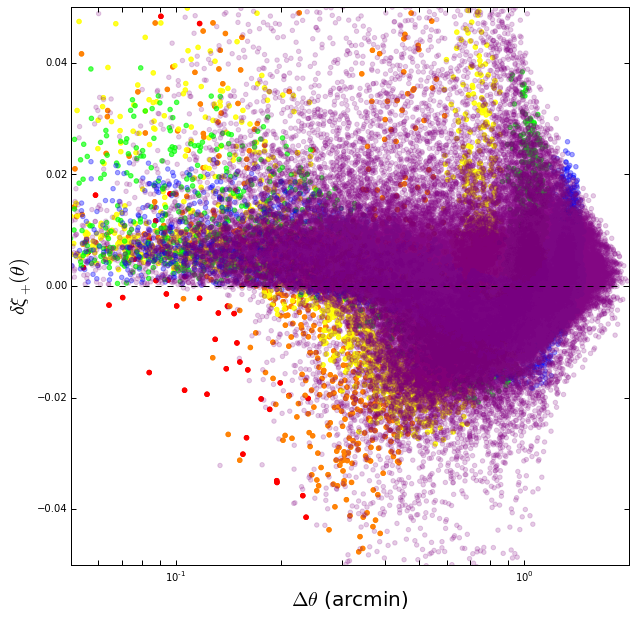

In [215]:
for i in range(len(c_purple)):
    c_purple[i] = purple = (0.5,0,0.5,0.1)

rc += r_purple
delc += del_purple
cc += c_purple


         
pangloss.plotting.plot_corr_component(rc,delc,'plus',cc)

In [25]:
del B

## Paper Plots

In [7]:
s = [1.65,1.35,-1.65,-1.35]
#s = [1.75,1.25,-1.75,-1.25]
#s = [1.5,1.45,-1.55,-1.45]

In [8]:
B = pangloss.BackgroundCatalog(N=30,domain=s,field=[0,0,0,0],sigma_e=0.05)
B.lens_by_map(K,S)
B.drill_lightcones()
B.lens_by_halos()

['/home/spencer/Documents/Pangloss/calib/Millennium/catalog_example.txt']
['/home/spencer/Documents/Pangloss/calib/Millennium/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa.fits']


KeyboardInterrupt: 

In [ ]:
r = 2.0
ms =  0.1

gg_none = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='none')
gg_map = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='map')
gg_halo = B.calculate_corr(corr_type='gg',min_sep = ms,max_sep=r,lensed='halo')

ng_none = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='none')
ng_map = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='map')
ng_halo = B.calculate_corr(corr_type='ng',min_sep = ms,max_sep=r,foreground=F,lensed='halo')

In [ ]:
pangloss.plotting.plot_corr(gg_none,corr_type='gg',corr_comp='plus',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(gg_map,corr_type='gg',corr_comp='plus',lensed='map',color='green')
pangloss.plotting.plot_corr(gg_halo,corr_type='gg',corr_comp='plus',lensed='halo',color='purple')

In [ ]:
pangloss.plotting.plot_corr(ng_none,corr_type='ng',corr_comp='real',lensed='none',galaxy_count=B.galaxy_count,color='blue')
pangloss.plotting.plot_corr(ng_map,corr_type='ng',corr_comp='real',lensed='map',color='green')
pangloss.plotting.plot_corr(ng_halo,corr_type='ng',corr_comp='real',lensed='halo',color='purple')